## simple perceptron

##### import data 

In [1]:
# import necessary packages

# math 
import numpy as np
# plot 
import matplotlib.pyplot as plt 
import seaborn as sns
# tables 
import pandas as pd

In [2]:
# load data from excel 
df = pd.read_excel(r'perceptron_data.xlsx') 

In [4]:
# you can check what the data looks like 
df

,x1,x2,y
0,-1,2,0
1,3,3,0
2,1,4,0
3,2,7,0
4,5,6,0
5,7,2,1
6,9,1,1
7,8,5,1
8,9,7,1
9,10,3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      10 non-null     int64
 1   x2      10 non-null     int64
 2   y       10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


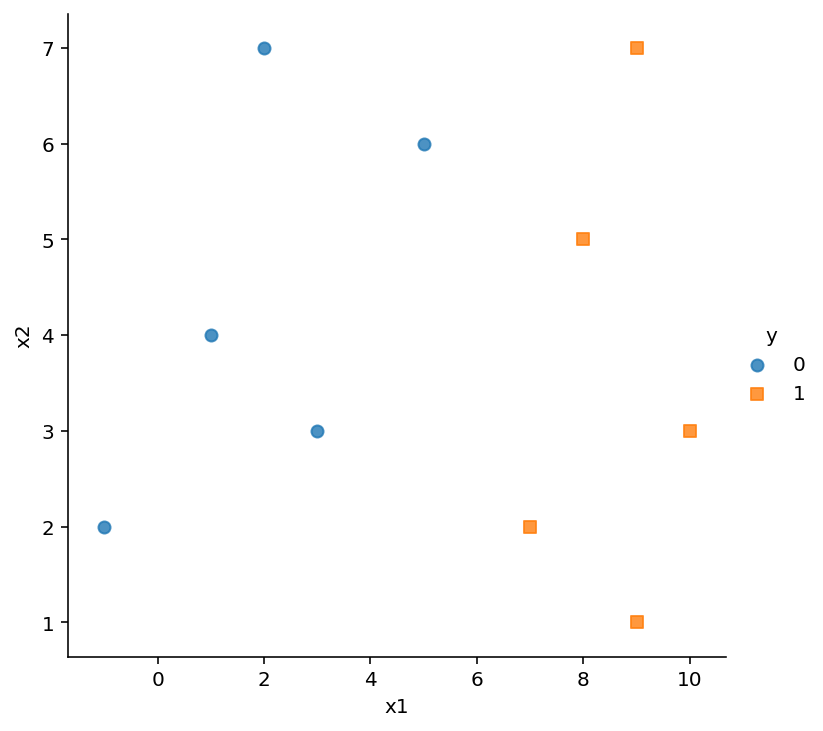

In [6]:
# plot the data 
sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])

##### guess initial weights and plot data (x1,x2,y) with initial weights

In [7]:
# define the intial weight weights = (threshold, w1, w2)
weights = np.array([-1, -5.1, 3.1])

# threshold = -1 
# w1 = -5.1
# w2 = 3.1


## here is an example that you can think about it 
# midterm 40% weight w1
# final 60% weight w2 
# final_grade = 0.4*midterm + 0.6*final 

# threshold = 60 
# if final_grade >= 60: 
    # print('you pass')
    # y = 1
# elif final_grade < 60: 
    # print('you fail')
    # y = 0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


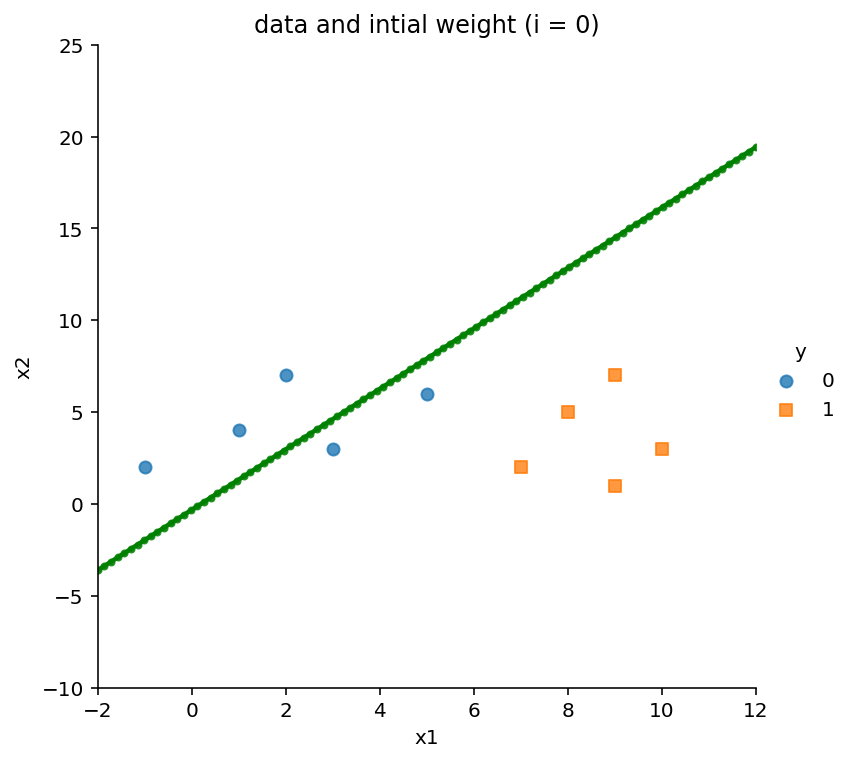

In [8]:
# plot training data and the intial weight 


sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])

x = np.linspace(-2,12,100)
z = -(weights[1]/weights[2])*x + (weights[0]/weights[2] ) # green line in the plot 

# print(weights[1])
# print(weights[2])
# print(weights[0])

sns.regplot(x,z, color="g", marker=".")

plt.title('data and intial weight (i = 0)')
plt.axis([-2,12,-10,25])
plt.show()


##### predict the output from the network 

In [9]:
# define a function called predict()
# the function return the output from the network 

# if w1*x1 + w2*x2 < bias, 
# return 1; 
# else 
# return 0 

# weights[1]*x1 + weights[2]*x2 = dot product of (weights[1], weights[2]) dot (x1, x2)

def predict(x1,x2,weights): 
    if weights[1]*x1 + weights[2]*x2 < weights[0]:  # dot product 
        output = 1
    else: 
        output = 0        
    return output

In [10]:
# apply predict function above to our dataset 
# print all answer, and you will see there are only 2 wrong predictions, which match our picture above

for i in range(len(df.x1)):
    output = predict(df.x1[i], df.x2[i], weights)
    if df.y[i] == output: 
        print('at point (%d, %d), actual = %d, predict = %d   -----------> y' %(df.x1[i], df.x2[i], df.y[i], output))
    else: 
        print('at point (%d, %d), actual = %d, predict = %d   -----------> n' %(df.x1[i], df.x2[i], df.y[i], output))

at point (-1, 2), actual = 0, predict = 0   -----------> y
at point (3, 3), actual = 0, predict = 1   -----------> n
at point (1, 4), actual = 0, predict = 0   -----------> y
at point (2, 7), actual = 0, predict = 0   -----------> y
at point (5, 6), actual = 0, predict = 1   -----------> n
at point (7, 2), actual = 1, predict = 1   -----------> y
at point (9, 1), actual = 1, predict = 1   -----------> y
at point (8, 5), actual = 1, predict = 1   -----------> y
at point (9, 7), actual = 1, predict = 1   -----------> y
at point (10, 3), actual = 1, predict = 1   -----------> y


##### update the weights based on the error term you computed above (backprop)

In [11]:
# define a function called update_weights()

# error = (predicted value - actual value)
# new_weights = old_weight + learning_rate * error * input 
# new_weights = old_weight + learning_rate * gradient  


def update_weights(weights, x1, x2, y, learning_rate):
    w = np.zeros((len(y),3))
    
    for i in range(len(y)):
        if i == 0:
            w[i] = weights 
        else:
            output = predict(x1[i], x2[i], w[i])   # predict values 
            error = output - y[i]  # erros 
            w[i][0] = w[i-1][0] + learning_rate*error # update weights 
            w[i][1] = w[i-1][1] + learning_rate*error*x1[i] # update weights 
            w[i][2] = w[i-1][2] + learning_rate*error*x2[i] # update weights       
    return w


In [12]:
learning_rate = 0.2

# you shall try different values for learning_rate 
# learning_rate = 20
# learning_rate = 0.002

w = update_weights(weights, df.x1, df.x2, df.y, learning_rate)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


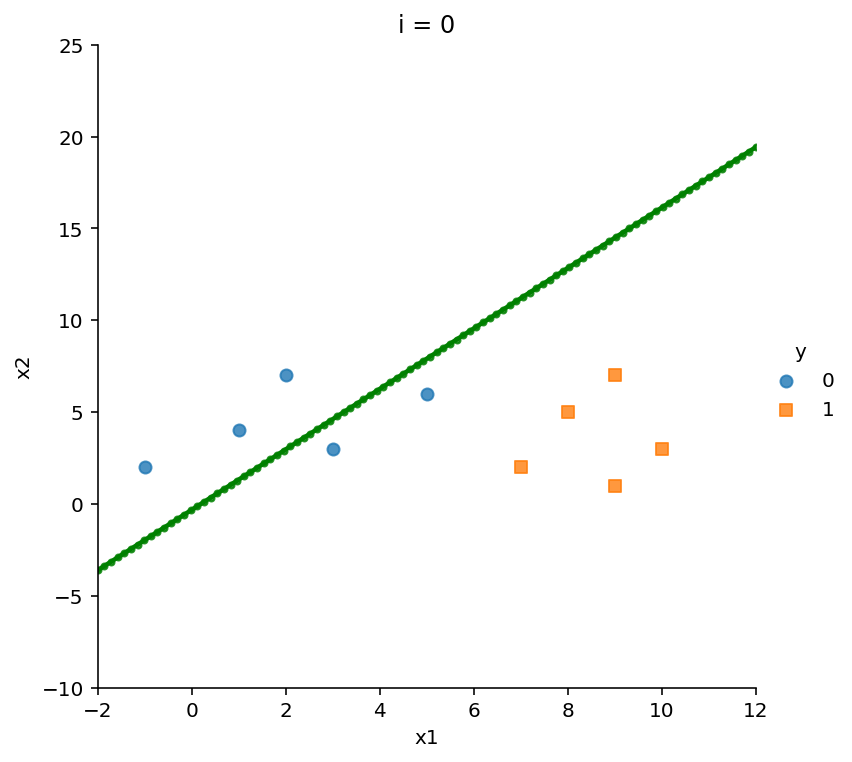

In [13]:
# plot some iterations

i = 0
x = np.linspace(-2,12,100)

sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])
# the green line 
z = -(w[i][1]/w[i][2])*x + (w[i][0]/w[i][2] ) 
sns.regplot(x,z, color="g", marker=".")

plt.axis([-2,12,-10,25])
plt.title('i = %d' %i)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


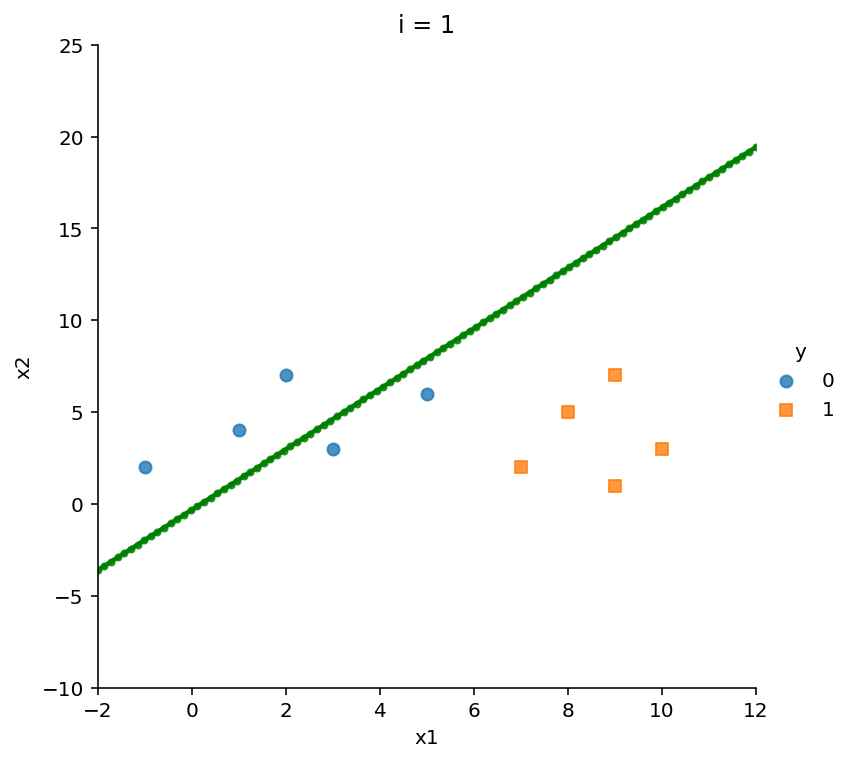

In [14]:
# plot some iterations

i = 1
x = np.linspace(-2,12,100)

sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])
# the green line 
z = -(w[i][1]/w[i][2])*x + (w[i][0]/w[i][2] ) 
sns.regplot(x,z, color="g", marker=".")

plt.axis([-2,12,-10,25])
plt.title('i = %d' %i)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


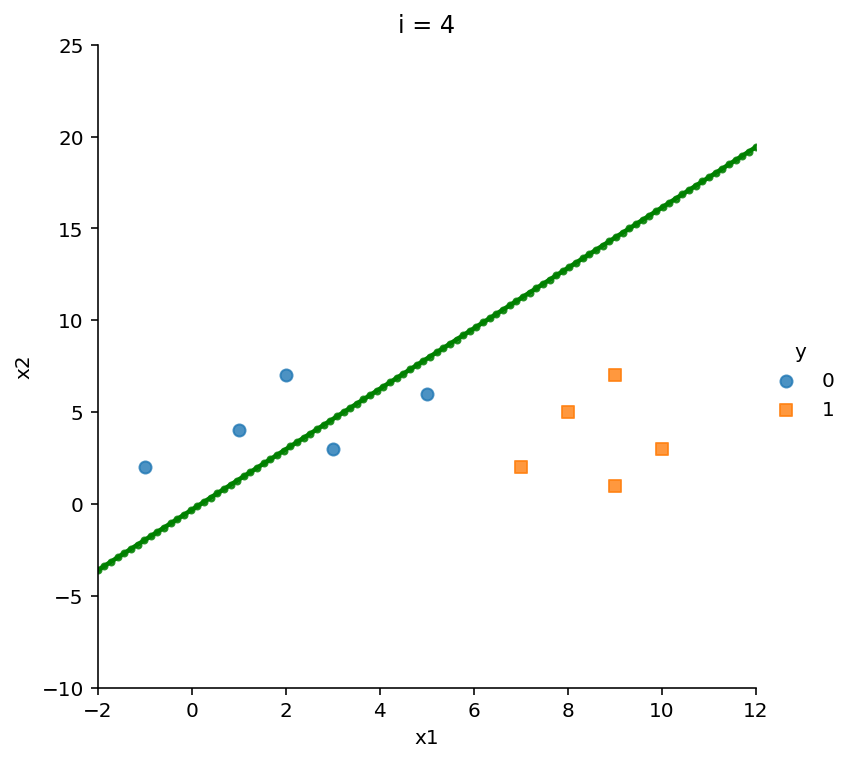

In [15]:
# plot some iterations

i = 4
x = np.linspace(-2,12,100)

sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])
# the green line 
z = -(w[i][1]/w[i][2])*x + (w[i][0]/w[i][2] ) 
sns.regplot(x,z, color="g", marker=".")

plt.axis([-2,12,-10,25])
plt.title('i = %d' %i)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


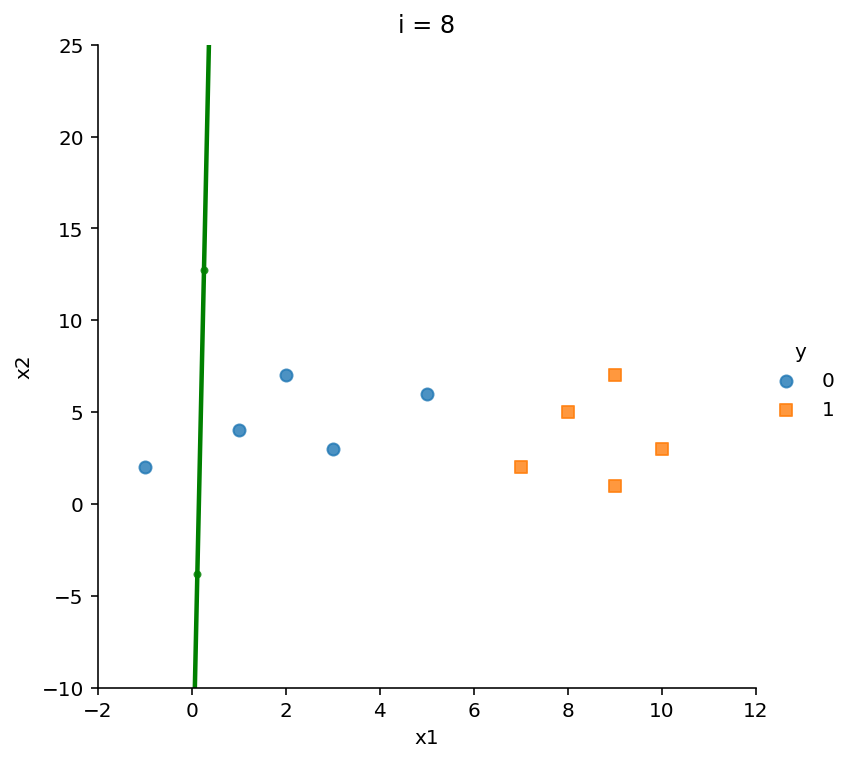

In [16]:
# plot some iterations

i = 8
x = np.linspace(-2,12,100)

sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])
# the green line 
z = -(w[i][1]/w[i][2])*x + (w[i][0]/w[i][2] ) 
sns.regplot(x,z, color="g", marker=".")

plt.axis([-2,12,-10,25])
plt.title('i = %d' %i)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


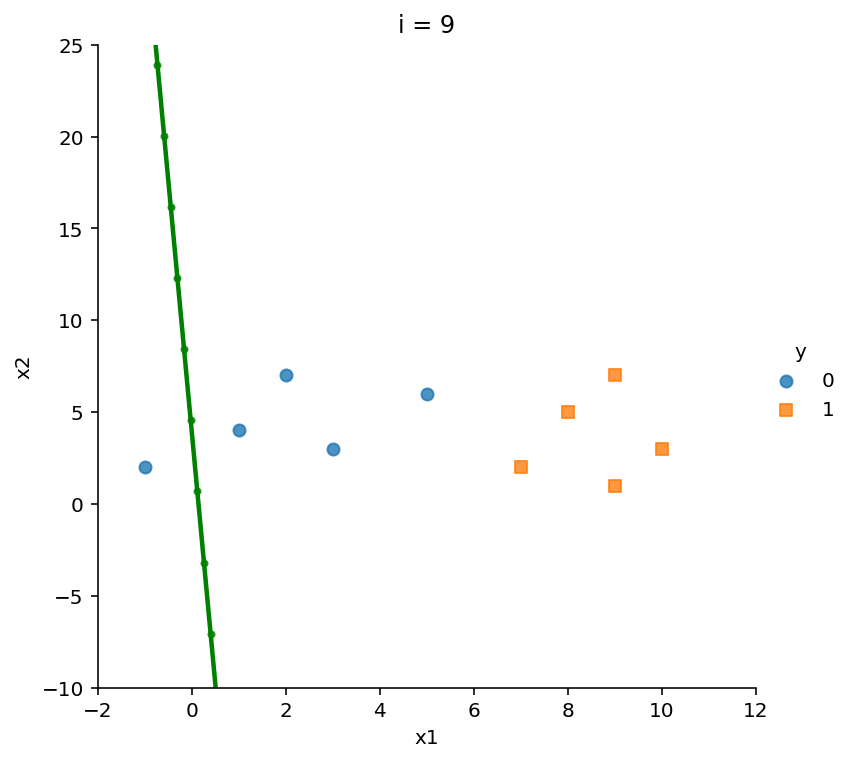

In [18]:
# plot some iterations

i = 9
x = np.linspace(-2,12,100)

sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])
# the green line 
z = -(w[i][1]/w[i][2])*x + (w[i][0]/w[i][2] ) 
sns.regplot(x,z, color="g", marker=".")

plt.axis([-2,12,-10,25])
plt.title('i = %d' %i)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexError: index 10 is out of bounds for axis 0 with size 10

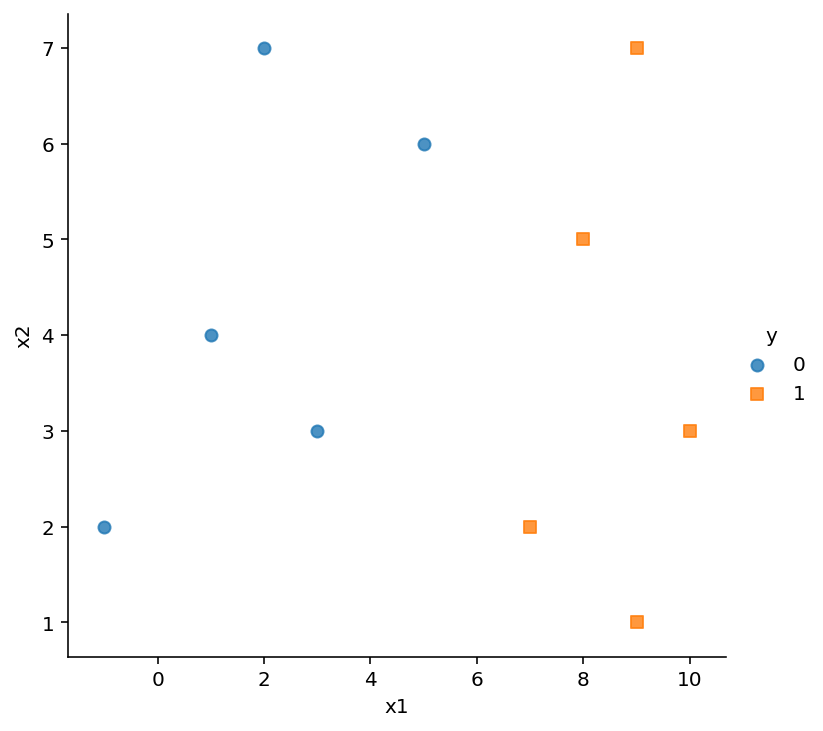

In [21]:
# plot some iterations

i = 10
x = np.linspace(-2,12,100)

sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])
# the green line 
z = -(w[i][1]/w[i][2])*x + (w[i][0]/w[i][2] ) 
sns.regplot(x,z, color="g", marker=".")

plt.axis([-2,12,-10,25])
plt.title('i = %d' %i)
plt.show()

##### train weights for the network (loop all your dataset)

In [22]:
def train_weights(weights, x1, x2, y, learning_rate, iteration):
    w = np.zeros((len(y)*iteration,3))
    for j in range(iteration):
        for i in range(len(y)):
            if i == 0: 
                if (i+j*len(y)) == 0: 
                    w[i + j*len(y)] = weights 
                else:
                    w[i + j*len(y)] = w[i+j*len(y)-1]
            else:
                output = predict(x1[i-1], x2[i-1], w[i+j*len(y)-1])
                error = output - y[i-1]
                w[i + j*len(y)][0] = w[i + j*len(y)-1][0] + learning_rate*error
                w[i + j*len(y)][1] = w[i + j*len(y)-1][1] + learning_rate*error*x1[i-1]
                w[i + j*len(y)][2] = w[i + j*len(y)-1][2] + learning_rate*error*x2[i-1]  
    return w

In [23]:
iteration = 2
w = train_weights(weights, df.x1, df.x2, df.y, learning_rate, iteration)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


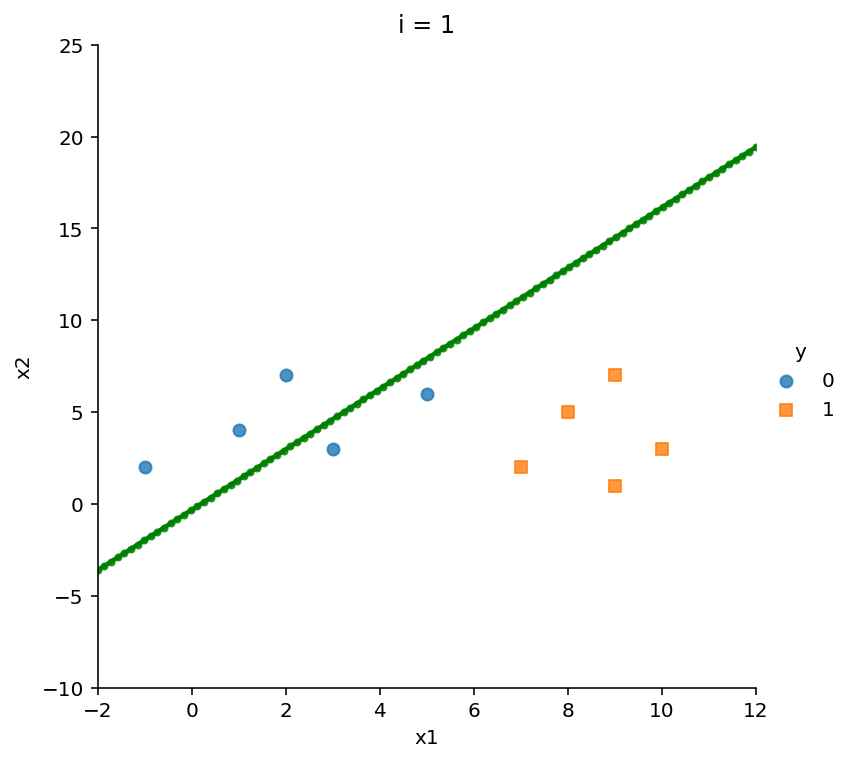

In [24]:
# plot some iterations

i = 1


sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])
x = np.linspace(-2,12,100)
z = -(w[i][1]/w[i][2])*x + (w[i][0]/w[i][2] ) 
sns.regplot(x,z, color="g", marker=".")

plt.axis([-2,12,-10,25])
plt.title('i = %d' %i)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


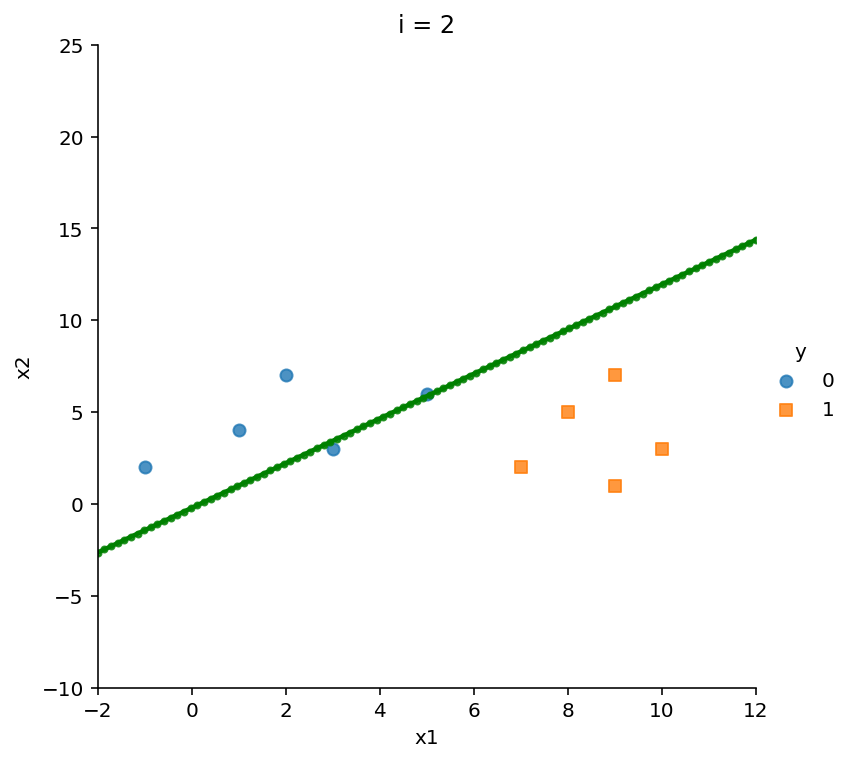

In [25]:
# plot some iterations

x = np.linspace(-2,12,100)

i = 2
sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])
z = -(w[i][1]/w[i][2])*x + (w[i][0]/w[i][2] ) 
sns.regplot(x,z, color="g", marker=".")

plt.axis([-2,12,-10,25])
plt.title('i = %d' %i)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


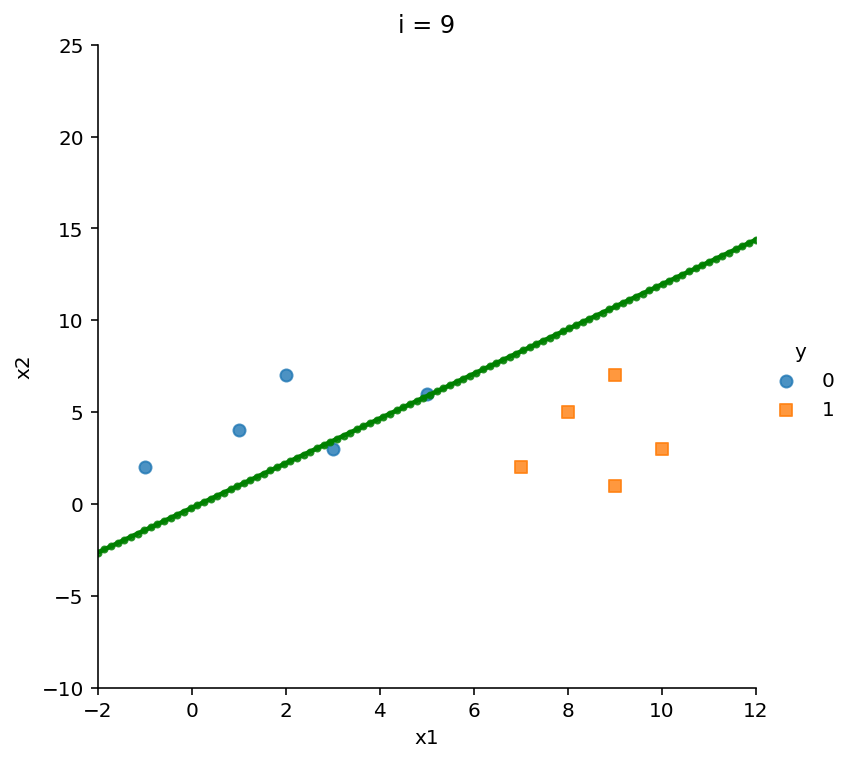

In [26]:
# plot some iterations

x = np.linspace(-2,12,100)

i = 9
sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])
z = -(w[i][1]/w[i][2])*x + (w[i][0]/w[i][2] ) 
sns.regplot(x,z, color="g", marker=".")

plt.axis([-2,12,-10,25])
plt.title('i = %d' %i)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


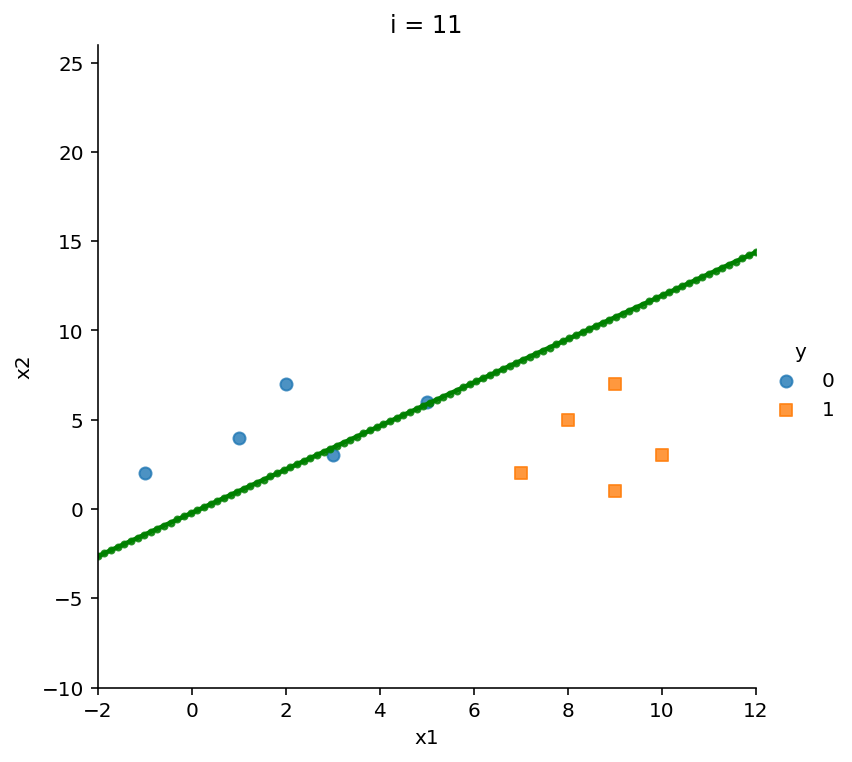

In [27]:
# plot some iterations

x = np.linspace(-2,12,100)

i = 11
sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])
z = -(w[i][1]/w[i][2])*x + (w[i][0]/w[i][2] ) 
sns.regplot(x,z, color="g", marker=".")

plt.axis([-2,12,-10,26])
plt.title('i = %d' %i)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


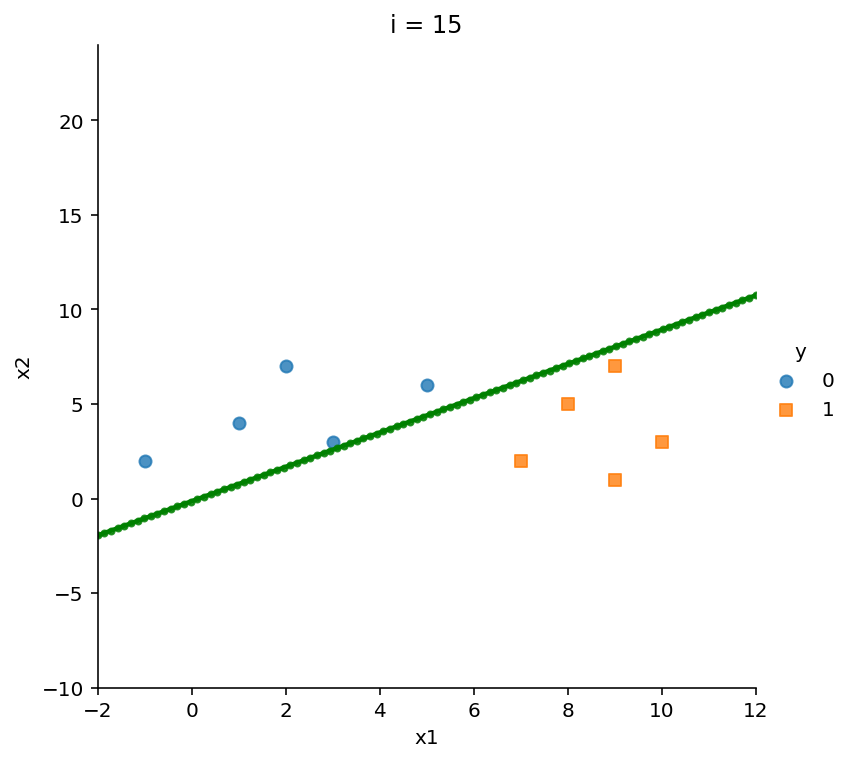

In [28]:
# plot some iterations

x = np.linspace(-2,12,100)

i = 15
sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])
z = -(w[i][1]/w[i][2])*x + (w[i][0]/w[i][2] ) 
sns.regplot(x,z, color="g", marker=".")

plt.axis([-2,12,-10,24])
plt.title('i = %d' %i)
plt.show()

##### homework 

write a new program which will classify 3 kinds of data (-1, 0, 1)

a) you need to create your own date in excel. (x1, x2) as inputs, y will be the output, y = 0, 1, -1

b) how many lines do you need?  

c) how to define the rule which finds the predicted value from the network? w1 * x1 + w2 * x2 greater or less than the threshold?? 

d) how to update your weights (threshold, w1, w2)